In [1]:
%load_ext google.cloud.bigquery

In [6]:
%%bigquery top_five_states 
SELECT
    state AS state,
    COUNT(1) AS birth_count
FROM `bigquery-public-data.samples.natality`
GROUP BY state
ORDER BY birth_count DESC
LIMIT 6

,state,birth_count
0,None,16998008
1,CA,13794114
2,TX,9986789
3,NY,8670137
4,IL,6032061
5,FL,5628888


In [3]:
%matplotlib inline

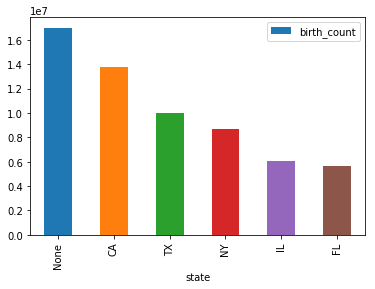

In [14]:
top_five_states.plot(kind='bar', x='state', y='birth_count');

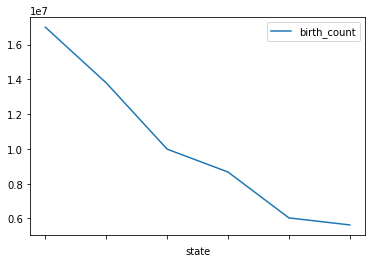

In [15]:
top_five_states.plot(x='state');

In [9]:
%%bigquery top_five_states_with_Ohio
SELECT
    state AS state, birth_count from (SELECT state,
    COUNT(1) AS birth_count
FROM `bigquery-public-data.samples.natality`
GROUP BY state
ORDER BY birth_count DESC
LIMIT 7)
    
UNION ALL

SELECT
    state,
    COUNT(1) AS birth_count
FROM `bigquery-public-data.samples.natality`
WHERE state='OH'
GROUP BY state
ORDER BY birth_count DESC
LIMIT 7

,state,birth_count
0,None,16998008
1,CA,13794114
2,TX,9986789
3,NY,8670137
4,IL,6032061
5,FL,5628888
6,OH,5147140


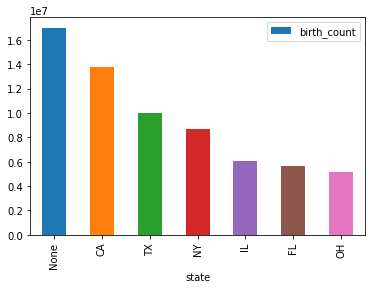

In [10]:
top_five_states_with_Ohio.plot(kind='bar', x='state', y='birth_count');

In [11]:
from google.cloud import bigquery
client = bigquery.Client()
sql = """
SELECT
    mother_age,
    COUNT(1) AS count,
    year
FROM
    `bigquery-public-data.samples.natality`
WHERE
    year>1997 AND year < 2009
GROUP BY
    mother_age, year
ORDER BY
    count DESC
"""
df = client.query(sql).to_dataframe()
df.head()


,mother_age,count,year
0,27,247287,2007
1,28,245403,2008
2,26,244752,2007
3,27,243650,2008
4,26,241740,2006


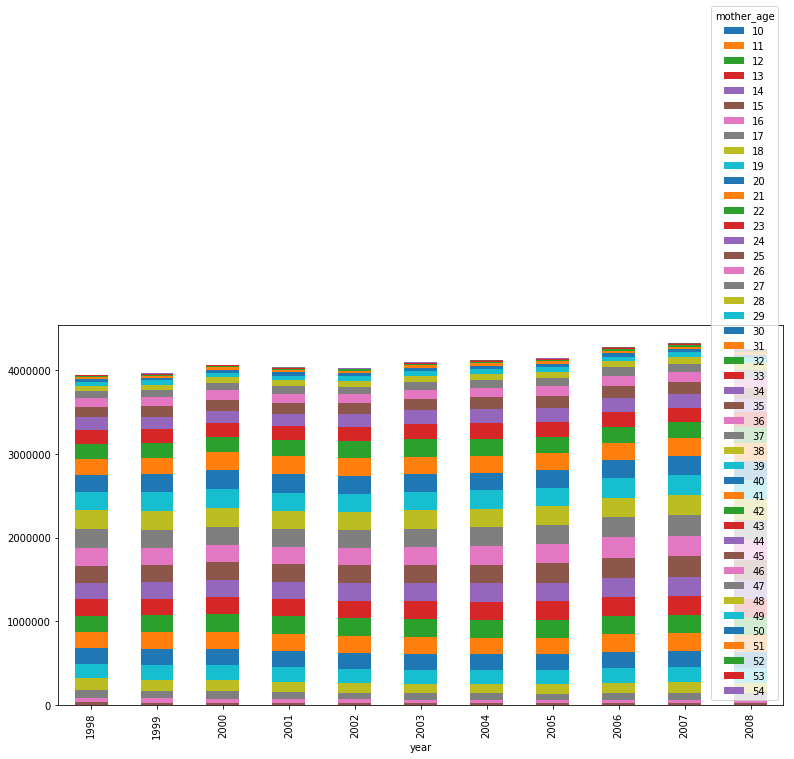

In [12]:
pivot_table = df.pivot(index='year', columns='mother_age', values='count')
pivot_table.plot(kind='bar', stacked=True, figsize=(13, 7));

In [13]:
%%bigquery father_age
SELECT
    year,
    AVG(father_age) AS AVG_father_age

FROM
    `bigquery-public-data.samples.natality`
WHERE
    year>1997 AND year < 2009
GROUP BY  year
ORDER BY
    year DESC
LIMIT 11

,year,AVG_father_age
0,2008,40.072469
1,2007,40.302761
2,2006,40.343240
3,2005,39.975258
4,2004,39.831135
5,2003,39.744694
6,2002,39.663417
7,2001,39.630709
8,2000,39.732720
9,1999,39.864549


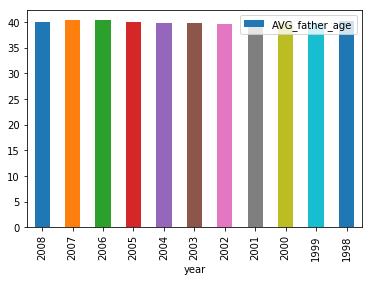

In [16]:
father_age.plot(kind='bar', x='year', y='AVG_father_age');

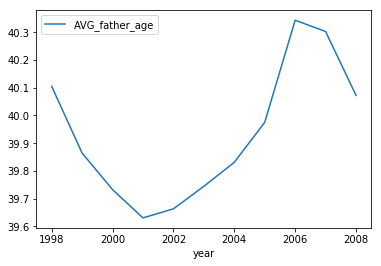

In [17]:
father_age.plot (x='year', y='AVG_father_age');